In [3]:
from all_func import *

In [4]:
from plotnine import *
import pandas as pd
import numpy as np
#from all_func import *
from datetime import date,datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pylatex as pl
import docx
from docx import Document

from docx.shared import Inches
from docx.shared import Pt
from docx.enum.section import WD_ORIENT, WD_SECTION

import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot

In [37]:
#df = pd.read_csv("df_only_data.csv")
df = pd.read_csv("client_data.csv")
df

batch  time  Assay
0       1     0   0.07
1       1     3   0.27
2       1     6   0.53
3       1     9   0.88
4       1    12   1.25
5       1    18   2.21
6       1    24   3.09
7       1    36   4.79
8       2     0   0.07
9       2     3   0.33
10      2     6   0.68
11      2     9   1.24
12      2    12   1.65
13      2    18   2.77
14      2    24   4.07
15      2    36   6.10
16      3     0   0.07
17      3     3   0.31
18      3     6   0.62
19      3     9   1.10
20      3    12   1.60
21      3    18   2.57
22      3    24   3.62
23      3    36   5.55
24      4     0   0.11
25      4     3   0.31
26      4     6   0.47
27      4     9   0.76
28      4    12   1.12

In [28]:
df.rename(columns = {"Assay" : "assay"},inplace = True)

NOB = len(np.unique(df['batch']))
NOB

4

In [35]:
df['batch']=df['batch'].astype('category')
model = ols('assay ~ time + batch + batch:time', data=df).fit()

#dir(model.summary())
A,B,C = pd.DataFrame(model.summary().tables[0]),pd.DataFrame(model.summary().tables[1]),pd.DataFrame(model.summary().tables[2])
#B.columns = ["Description","Value"]*2
A.at[0,1] = "Assay"
print(A)
print(B)
print(C)

                   0                 1                      2         3
0     Dep. Variable:             Assay    R-squared:              0.994
1             Model:               OLS    Adj. R-squared:         0.992
2            Method:     Least Squares    F-statistic:            508.8
3              Date:  Fri, 09 Feb 2024    Prob (F-statistic):  5.70e-22
4              Time:          16:29:55    Log-Likelihood:        18.098
5  No. Observations:                29    AIC:                   -20.20
6      Df Residuals:                21    BIC:                   -9.258
7          Df Model:                 7                                 
8   Covariance Type:         nonrobust                                 
                 0           1          2          3       4          5  \
0                         coef    std err          t   P>|t|     [0.025   
1        Intercept     -0.1929      0.084     -2.290   0.033     -0.368   
2       batch[T.2]     -0.0356      0.119     -0.299   

In [36]:
print(sm.stats.anova_lm(model, typ = "I"))
print(sm.stats.anova_lm(model, typ = "II"))
print(sm.stats.anova_lm(model, typ = "III"))


              df     sum_sq    mean_sq            F        PR(>F)
batch        3.0   8.350836   2.783612   119.939733  2.252270e-13
time         1.0  73.103242  73.103242  3149.858257  2.279949e-24
batch:time   3.0   1.197877   0.399292    17.204623  7.145836e-06
Residual    21.0   0.487377   0.023208          NaN           NaN
               sum_sq    df            F        PR(>F)
batch        1.067442   3.0    15.331245  1.639648e-05
time        73.103242   1.0  3149.858257  2.279949e-24
batch:time   1.197877   3.0    17.204623  7.145836e-06
Residual     0.487377  21.0          NaN           NaN
               sum_sq    df           F        PR(>F)
Intercept    0.121655   1.0    5.241841  3.250826e-02
batch        0.102035   3.0    1.465484  2.525849e-01
time        18.504693   1.0  797.326616  3.454489e-18
batch:time   1.197877   3.0   17.204623  7.145836e-06
Residual     0.487377  21.0         NaN           NaN


In [33]:
def convert_summary_result_into_dataframe(model,key = "assay"):
    # model is the variable comming from :
    #
    # model = ols('assay ~ time * batch', data=df).fit()
    #
    model_metric = pd.DataFrame(model.summary().tables[0])
    model_metric.at[0,1] = key
    coef_table = pd.DataFrame(model.summary().tables[1])
    other_statistics = pd.DataFrame(model.summary().tables[2])
    #B.columns = ["Description","Value"]*2
    model_metric.columns = ["Description","Value"]*2
    other_statistics.columns = ["Description","Value"]*2
    coef_table.columns = coef_table.loc[0] 
    coef_table = coef_table.drop(index = [0])
    return(model_metric,coef_table,other_statistics)

In [9]:
convert_summary_result_into_dataframe(model)

(         Description             Value            Description     Value
 0     Dep. Variable:             assay    R-squared:              0.993
 1             Model:               OLS    Adj. R-squared:         0.988
 2            Method:     Least Squares    F-statistic:            231.6
 3              Date:  Fri, 09 Feb 2024    Prob (F-statistic):  7.73e-12
 4              Time:          12:06:34    Log-Likelihood:       -4.2993
 5  No. Observations:                20    AIC:                    24.60
 6      Df Residuals:                12    BIC:                    32.56
 7          Df Model:                 7                                 
 8   Covariance Type:         nonrobust                                 ,
 0                         coef    std err          t   P>|t|     [0.025  \
 1        Intercept    100.2000      0.300    334.000   0.000     99.546   
 2       batch[T.2]     -2.0000      0.424     -4.714   0.001     -2.924   
 3       batch[T.3]      1.8000      0.42

In [10]:
anova = sm.stats.anova_lm(model, type=2)
p_value_time_batch_intercation = anova.at["time:batch","PR(>F)"]
if p_value_time_batch_intercation < 0.25:
    print("Model with interaction of batch and time is significant")

Model with interaction of batch and time is significant


In [11]:
coefficients = model.params
coefficients

Intercept          100.200000
batch[T.2]          -2.000000
batch[T.3]           1.800000
batch[T.4]          -0.800000
time                -0.866667
time:batch[T.2]      0.100000
time:batch[T.3]      0.166667
time:batch[T.4]      0.266667
dtype: float64

In [12]:
intercepts = [coefficients[0]]
slopes = [coefficients[NOB]]
for i in range(1,NOB):
    intercepts.append(coefficients[0] + coefficients[i])
    slopes.append(coefficients[NOB] + coefficients[NOB + i])
print(slopes)
print(intercepts)
#dd = pd.DataFrame({"Intercept" : intercepts,"slopes" : slopes})
#dd["group"] = colors[:4]

[-0.866666666666661, -0.7666666666666645, -0.6999999999999997, -0.5999999999999953]
[100.19999999999989, 98.19999999999995, 101.99999999999996, 99.39999999999992]


In [13]:
colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # yellow-green
    '#17becf'   # cyan
]

In [14]:
A = ggplot() + geom_point(data = df, mapping = aes(x = 'time',y = 'assay', colour ='batch'))#,shape='batch'))
A = A + scale_color_manual(values = colors[0:NOB])
A = A + geom_abline(slope = slopes,intercept = intercepts,colour = colors[:NOB],size = 0.5,show_legend = True,inherit_aes = False)

In [15]:
max_time = df['time'].max()

In [95]:
all_upper_cut = []
refrigerator = False
ulv = 105
llv = 95

In [16]:
all_upper_cut = []
all_lower_cut = []
for i in range(NOB):
    s = len(np.arange(0, max_time + 15, 0.01 ))
    Q = {'batch': np.repeat(i + 1, repeats = s),'time': np.arange(0, max_time + 15, 0.01)}
    newdata = pd.DataFrame(data = Q)
    predictions = model.get_prediction(newdata).summary_frame(alpha = 0.05)
    pred_CI = pd.concat([newdata,predictions],axis = 1)
    A = A + geom_line(data = pred_CI,mapping = aes(x = 'time',y = 'mean_ci_upper'),color = colors[i],linetype = "dashed",size = 0.3)
    A = A + geom_line(data = pred_CI,mapping = aes(x = 'time',y = 'mean_ci_lower'),color = colors[i],linetype = "dashed",size = 0.3)

    upper_cut = cutU(pred_CI['mean_ci_upper'], ulv, pred_CI['time'], max_time, slopes[i],other_details["refrigerator"])
    lower_cut = cutL(pred_CI['mean_ci_lower'], lv"], pred_CI['time'], max_time, slopes[i],other_details["refrigerator"])

    all_upper_cut.append(upper_cut)
    all_lower_cut.append(lower_cut)

all_cuts = all_upper_cut + all_lower_cut

Cut = Round(min(all_cuts),2)

shelf_Cut = Round(cut(Cut,max_time,other_details["refrigerator"]),2)

A = A + geom_hline(yintercept = (other_details["llv"]), linetype = 'dashed', size = 0.4)
A = A + geom_hline(yintercept = (other_details["ulv"]), linetype = 'dashed', size = 0.4)

NameError: name 'other_details' is not defined

In [74]:
A

ValueError: 'dasdhdot' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

In [36]:
def cut(cut_point,ShelfMax,ref):
    #print("cut_point",cut_point,"Shelf Max ",ShelfMax,"ref ",ref)
    if ref==True:
        point=min(cut_point,ShelfMax*1.5,ShelfMax+6)
    else:
        point=min(cut_point,ShelfMax*2,ShelfMax+12)
    return point

In [37]:
Cut = Round(min(all_upper_cut),2)

In [27]:
shelf_Cut = Round(cut(Cut,max_time,refrigerator),2)

In [28]:
if refrigerator==True:
    if (shelf_Cut==Cut and shelf_Cut<max_time+6 and shelf_Cut>0):
        A = A + geom_vline(xintercept = shelf_Cut,color = "black", linetype='dashed', size=0.4)
else:
    if (shelf_Cut==Cut and shelf_Cut<max_time+12 and shelf_Cut>0):
        A = A + geom_vline(xintercept = shelf_Cut,color = "black", linetype='dashed', size=0.4)

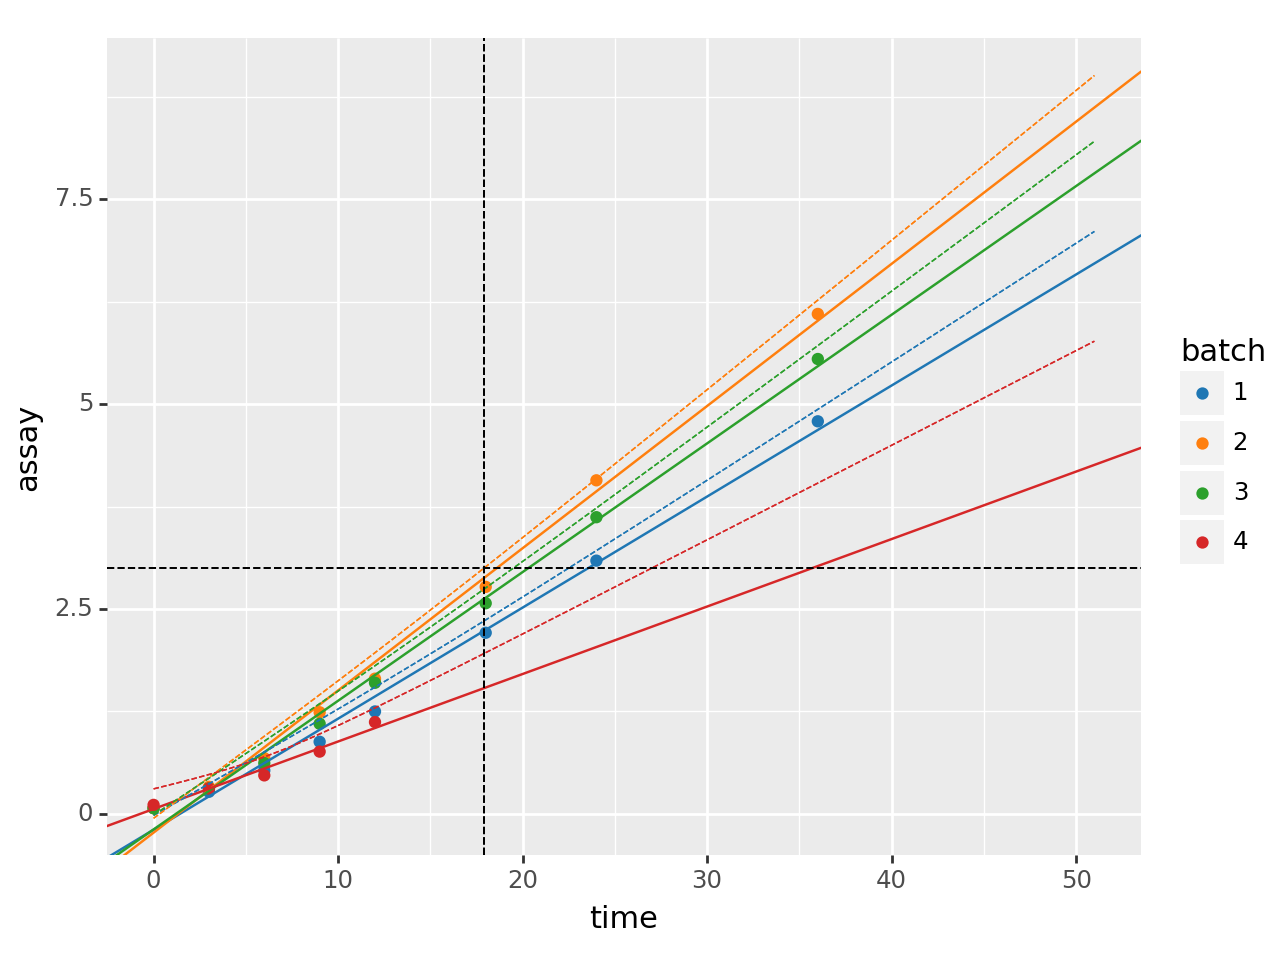

<Figure Size: (640 x 480)>

In [29]:
A

In [1]:
import numpy as np

In [2]:
arr = np.array([1,2,3,3,1,1,4])


In [3]:
arr

array([1, 2, 3, 3, 1, 1, 4])

In [6]:
str(list(np.unique(arr)))

'[1, 2, 3, 4]'

In [12]:
(1 - int("95%".strip("%"))/100)*2

0.10000000000000009

In [9]:
float("90%".strip("%"))/100

0.9

In [ ]:
def add_table_to_word(frame->pd.DataFrame):
    
    table = document.add_table(frame.shape[0] + 1, frame.shape[1])

    # add the header rows.
    for j in range(table.shape[1]):             
        table.cell(0,j).text = frame.columns[j]

    # add the rest of the data frame
    for i in range(RefC.shape[0]):
        for j in range(RefC.shape[-1]):
            table.cell(i+1,j).text = str(frame.values[i,j])

    table.style = 'Light Grid Accent 1'
    table.alignment = 1


In [26]:
ls = ["batch","time","Residual"]
ls = ["batch","Residual"]
ls = ["time"]

In [27]:
from functools import reduce

In [33]:
def term_in_model(ls): 
    #ls is actual anova.index,where anova corresponds to anova table for appropriate model coosen
    #a typical ls would be ls = ["batch","time","Residual"]
    try:
        return(reduce(lambda x,y : str(x) + " : " + str(y),ls[:-1]))
    except TypeError:
        return(ls[0])

In [32]:
list(map(term_in_model,[["batch","time","Residual"],["batch","Residual"],["time"]]))

['batch : time', 'batch', 'time']

In [41]:
import pandas as pd
df = pd.DataFrame({
    "A" : [1,2,3,4],
    "B" : ["a","b","c","d"]
},index = ["AA","BB","CC","DD"])

In [42]:
df

A  B
AA  1  a
BB  2  b
CC  3  c
DD  4  d

In [43]:
df.reset_index().rename(columns = {"index" : "Description"})

A  B
0  AA  1  a
1  BB  2  b
2  CC  3  c
3  DD  4  d

In [45]:
["coef","std err","t","P>|t|","lower","upper"]

TypeError: type str doesn't define __round__ method

In [90]:
df = pd.DataFrame({"Intecepts" : [90.008554,90.008554,96.151411],
                   "Slopes" :  [-0.084165,-0.084165,-0.084165]})

In [97]:
def create_equation(lines_coefficients_dataframe,name_of_parameter = "Assay"):
    # lines_coefficients_dataframe is the dataframe comming from function which calculate shelf life 
    # in any cases :different,parallel or single line
    # An example is the folowing for parallel line case
    # df = pd.DataFrame({"Intecepts" : [90.008554,95.151411,96.151411],
    #                    "Slopes" :  [-0.084165,0.084165,-0.084165]})
    lines_coefficients_dataframe["Slopes"] = ["+" + str(x) if x > 0 else x for x in df["Slopes"]]
    if len(lines_coefficients_dataframe) > 1:
        ls = []
        for i in range(len(df)):
            ls.append("Batch" + str(i + 1) + " : " + name_of_parameter + " = " + str(df["Intecepts"][i]) + " " + str(df["Slopes"][i]))
    else:
        ls = [name_of_parameter + " = " + str(df["Intecepts"][0]) + " " + str(df["Slopes"][0])]
    return(ls)
    

In [98]:
create_equation(df)

['Batch1 : Assay = 90.008554 -0.084165',
 'Batch2 : Assay = 90.008554 -0.084165',
 'Batch3 : Assay = 96.151411 -0.084165']